# <center style='color:coral'>`HistGradientBoostingClassifier` using Scikit-Learn</center>

# 1. Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics

# 2. Load `letter_recognition` dataset

In [2]:
df = pd.read_csv('letter_recognition.csv')
df.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G


In [3]:
df.shape

(20000, 17)

In [4]:
df.lettr.unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [5]:
df.lettr.value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: lettr, dtype: int64

In [6]:
df.isnull().sum().sum()

0

# 3. Perform preprocessing

In [7]:
labelencoder = LabelEncoder()
df.lettr = labelencoder.fit_transform(df.lettr)
df.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,19
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,8
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,3
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,13
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,6


In [8]:
df.lettr.unique()

array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

In [9]:
df.lettr.value_counts()

20    813
3     805
15    803
19    796
12    792
0     789
23    787
24    786
13    783
16    783
5     775
6     773
4     768
1     766
21    764
11    761
17    758
8     755
14    753
22    752
18    748
9     747
10    739
2     736
7     734
25    734
Name: lettr, dtype: int64

# 4. Separate features and classes

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 5. Split the dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1) 

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(16000, 4000, 16000, 4000)

# 6. Apply `HistGradientBoostingClassifier`

In [13]:
hist_gbc = HistGradientBoostingClassifier(learning_rate=0.2, max_depth=4, random_state=1)
hist_gbc.fit(X_train, y_train)

HistGradientBoostingClassifier(learning_rate=0.2, max_depth=4, random_state=1)

In [14]:
print('Accuracy on the train set:', round(hist_gbc.score(X_train, y_train), 4))
print('Accuracy on the test set:', round(hist_gbc.score(X_test, y_test), 4))

Accuracy on the train set: 0.9964
Accuracy on the test set: 0.9553


# 7. Plot `confusion_matrix`

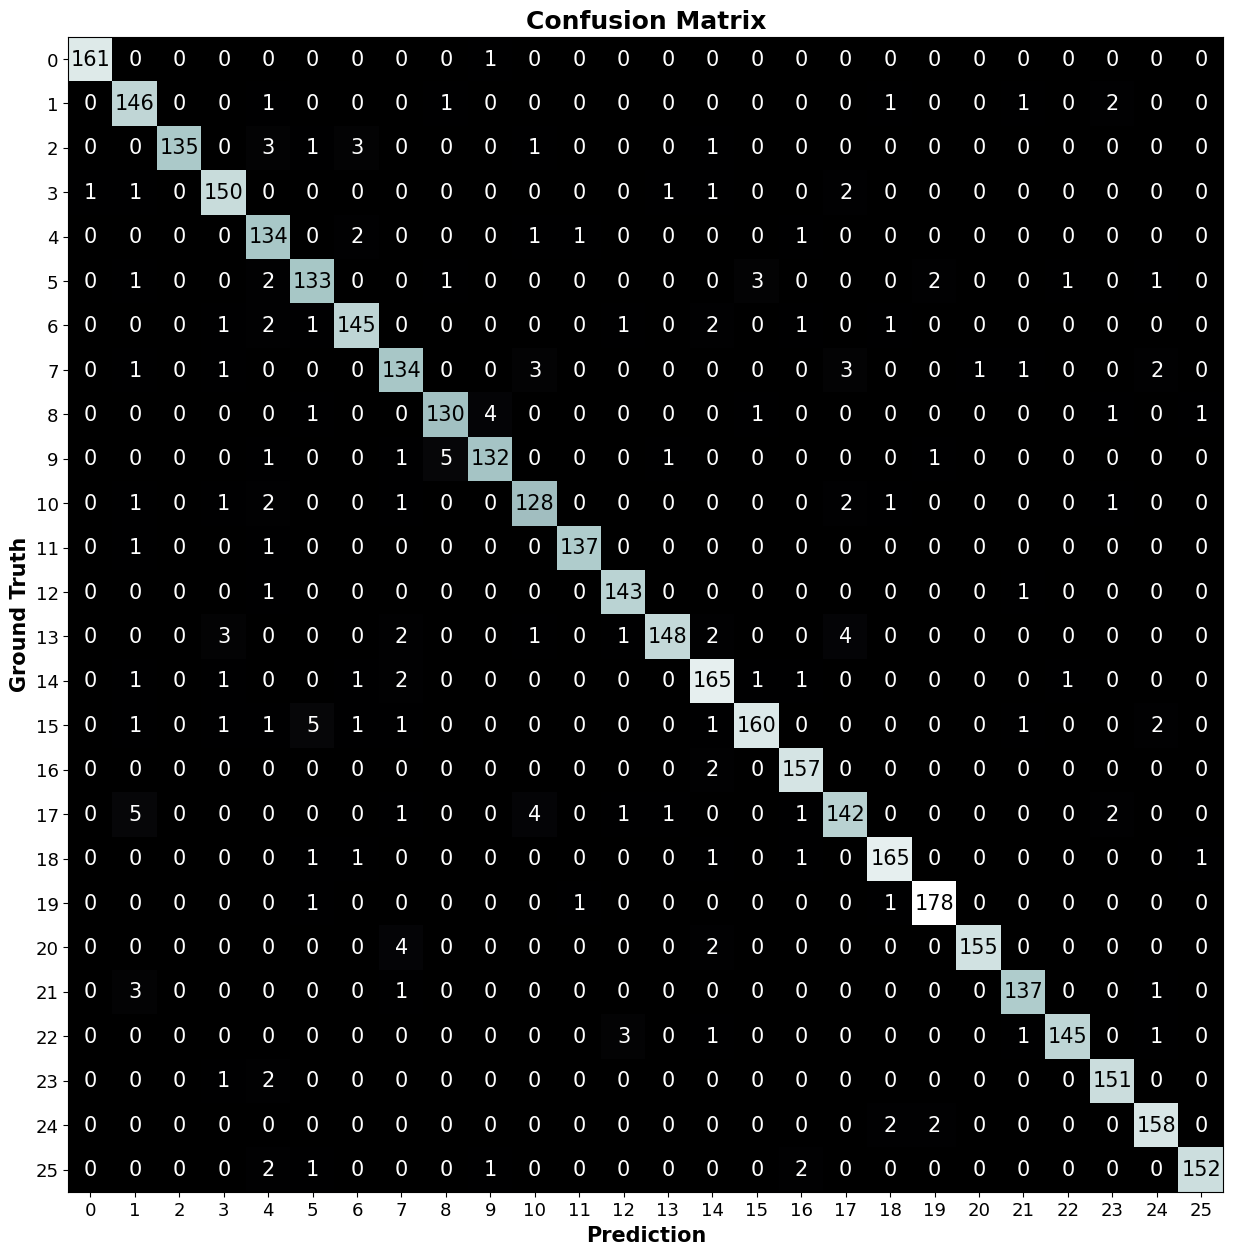

In [15]:
y_pred = hist_gbc.predict(X_test)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=hist_gbc.classes_, cmap='bone',
                                                       colorbar=False, text_kw={'size': 15})

fig = disp.figure_
fig.set_figwidth(20)
fig.set_figheight(15)

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

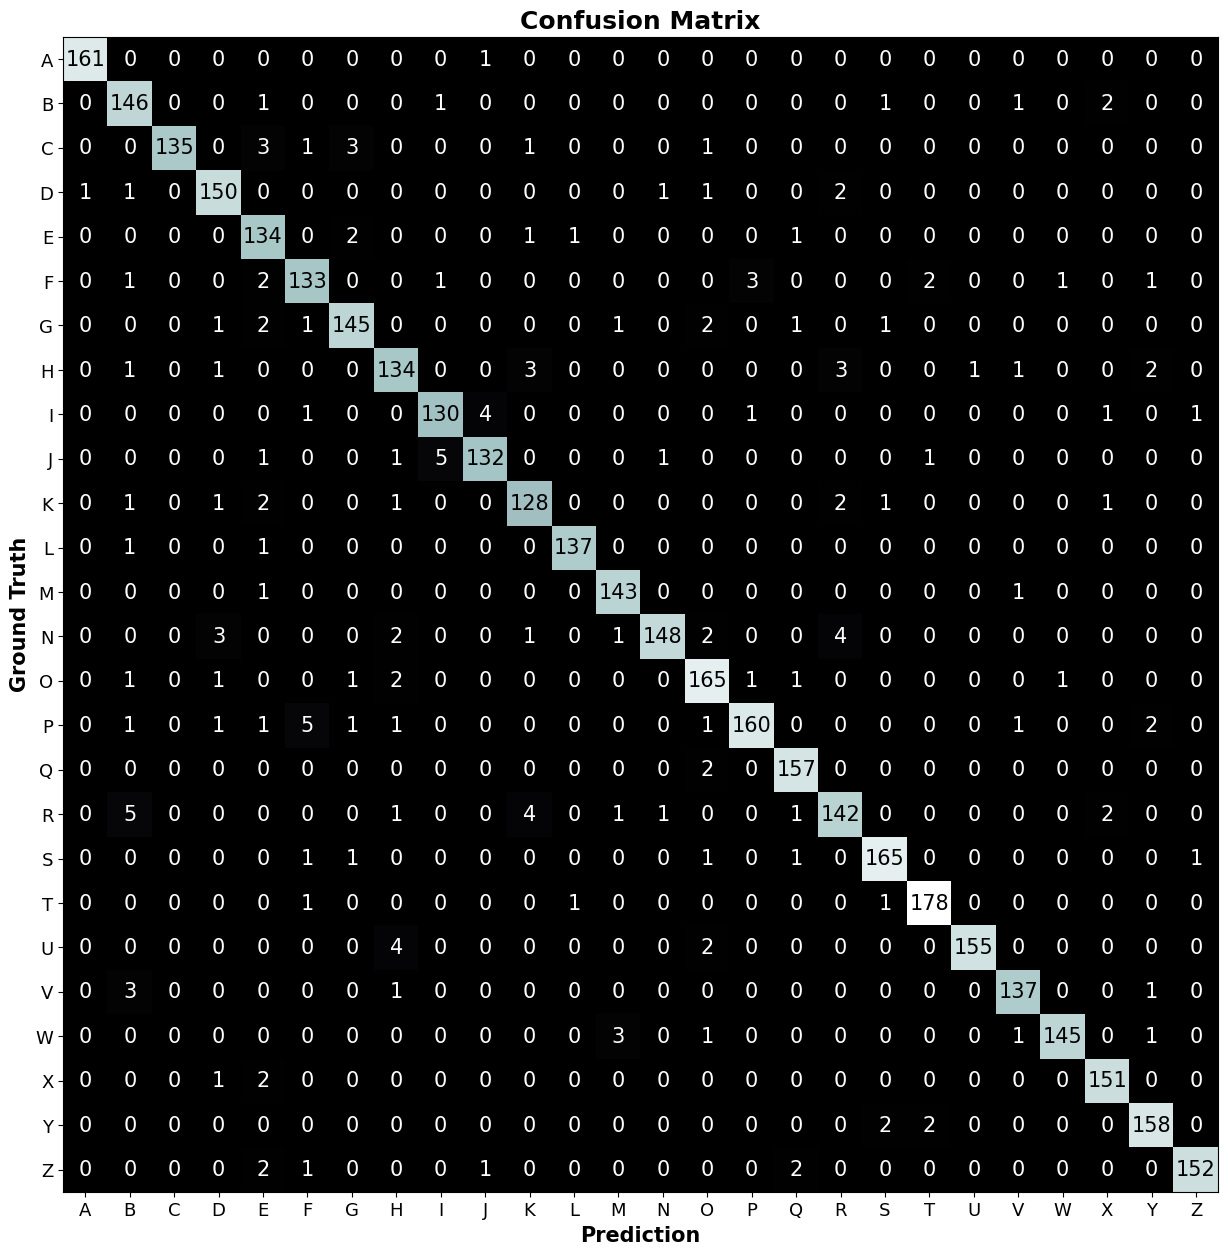

In [16]:
cat_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
              'X', 'Y', 'Z']
y_pred = hist_gbc.predict(X_test)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=cat_labels, cmap='bone', colorbar=False,
                                                       text_kw={'size': 15})

fig = disp.figure_
fig.set_figwidth(20)
fig.set_figheight(15)

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

# 8. Print `classification_report`

In [17]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       162
           1       0.91      0.96      0.93       152
           2       1.00      0.94      0.97       144
           3       0.94      0.96      0.95       156
           4       0.88      0.96      0.92       139
           5       0.92      0.92      0.92       144
           6       0.95      0.94      0.94       154
           7       0.91      0.92      0.91       146
           8       0.95      0.94      0.95       138
           9       0.96      0.94      0.95       141
          10       0.93      0.93      0.93       137
          11       0.99      0.99      0.99       139
          12       0.96      0.99      0.97       145
          13       0.98      0.92      0.95       161
          14       0.93      0.95      0.94       173
          15       0.97      0.92      0.94       174
          16       0.96      0.99      0.97       159
          17       0.93    